In [2]:
import tensorflow as tf


def load_tflite_model(model_path):
    # Load TFLite model and allocate tensors
    tf_lite_model = tf.lite.Interpreter(model_path=model_path)
    tf_lite_model.allocate_tensors()
    input_detail = tf_lite_model.get_input_details()
    output_detail = tf_lite_model.get_output_details()
    return tf_lite_model, input_detail, output_detail


def variance_of_laplacian(image):
    # compute the Laplacian of the image and then return the focus
    # measure, which is simply the variance of the Laplacian
    return cv2.Laplacian(image, cv2.CV_64F).var()    

SyntaxError: invalid syntax (pywrap_tensorflow_internal.py, line 114)

# New Section

In [1]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt


#from util import save_img

IMG_SIZE = 224
image_height = 256
image_width = 256

model_path = "hed_lite_model_quantize.tflite"
t_load = time.time()
hed_tflite_model, input_details, output_details = load_tflite_model(model_path)
print(f'load tflite model time: {time.time() - t_load}')
print('input_details: ', input_details)
print('output_details: ', output_details)

#file_name = 'test_imgs/cccd_front.jpg'
file_name = 'cccd_front.jpg'
t_infer = time.time()

# show image
img = cv2.imread(filename=file_name)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap=plt.cm.gray)

img = cv2.resize(img, (image_height, image_width))
# img = img / 255.0

# Preprocess the image to required size and cast
input_shape = input_details[0]['shape']
# input_tensor= np.array(np.expand_dims(img,0), dtype=np.float32)
input_tensor = np.array(img).astype(np.float32)

# set the tensor to point to the input data to be inferred
input_index = hed_tflite_model.get_input_details()[0]["index"]
hed_tflite_model.set_tensor(input_index, input_tensor)

# Run the inference
hed_tflite_model.invoke()
result = hed_tflite_model.get_tensor(output_details[0]['index'])

dsn_fuse_image = np.where(result > 0.0, [255], [0])
#cv2.imwrite('results/cccd_front_result_tflite.jpg', dsn_fuse_image)
cv2.imwrite('cccd_front_result_tflite.jpg', dsn_fuse_image)






ModuleNotFoundError: No module named 'cv2'

11134.353713987162


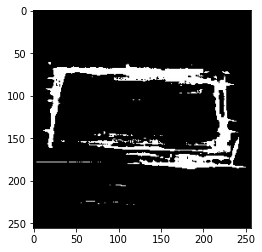

In [ ]:
image_result = cv2.imread('cccd_front_result_tflite.jpg')
plt.imshow(image_result)
test_result = variance_of_laplacian(image_result) 
print(test_result)
